In [5]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
#read csv file
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


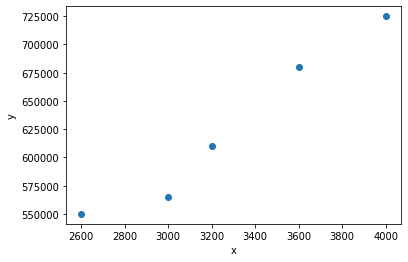

In [7]:
# plot the graph
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(df.area,df.price)
# plt.show()

In [8]:
# drop one column two make it two dimensional coz model accepts 2d arrays only
newdf=df.drop("price",axis="columns")
newdf

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
price=df.price
price


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
# create instance of linear regression class and train the model using model.fit()
model=linear_model.LinearRegression()
model.fit(newdf,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# predict the values
model.predict([[5]])

array([181295.37671233])

In [12]:
areasdf=pd.read_csv("areas.csv")

In [13]:
prices=model.predict(areasdf)

In [14]:
areasdf["price"]=prices

In [15]:
ypredicted=areasdf.head(5)
ypredicted=ypredicted.drop("area",axis="columns")
ypredicted

,price
0,316404.109589
1,384297.945205
2,492928.082192
3,661304.794521
4,740061.643836


In [16]:
areasdf.to_csv("predicted values.csv")

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=mean_squared_error(price,ypredicted)

In [18]:
rmse

20300494077.218994

In [19]:
r2_score(price,ypredicted)

-3.5172438979125484

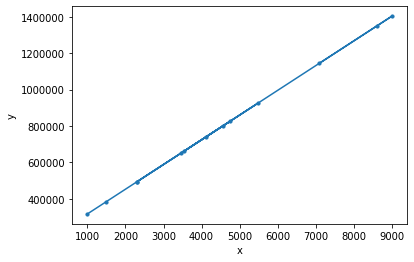

In [20]:
plt.scatter(areasdf.area,areasdf.price , s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(areasdf.area, areasdf.price)
plt.show()

Save the trained model to be used in future without training again

In [21]:
from sklearn.externals import joblib

H:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [26]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [27]:
mj=joblib.load('model_joblib')

In [28]:
mj.predict([[200]])

array([207773.97260274])